### Let us classify a new Invention, infer it's dominant topic and get some insights from Tableau

In [95]:
# nltk.download('wordnet')
%matplotlib inline

In [96]:
# Import Dependencies
from gensim.models import LdaModel
from gensim import models, corpora, similarities
from scipy.stats import entropy
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import time
from nltk import FreqDist
from gensim.test.utils import datapath
import pyLDAvis.gensim as gensimvis
import pyLDAvis
from gensim.corpora import Dictionary, MmCorpus

In [97]:
from gensim.test.utils import datapath
import seaborn as sns
sns.set_style("darkgrid")

### Import Our Model

In [13]:
# Save model to disk.
temp_file = datapath("/Users/GeYu/Desktop/FINAL_CAPSTONE/modelfinal50topics")
#optimal_model.save(temp_file)

# # Load a potentially pretrained model from disk.
lda = LdaModel.load(temp_file)

In [14]:
corpus = MmCorpus('abstract_final_50.mm')
#corpus[0]

In [15]:
dictionary = Dictionary.load('abstract_final_50.dict')
#dictionary[0]

### Topic Visualization for our best model

In [16]:
data = gensimvis.prepare(lda, corpus, dictionary)
pyLDAvis.display(data)

/Users/GeYu/anaconda3/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


#### Define some basic function to clean, lemmatize and tokenize the text

In [18]:
def initial_clean(text):
    """
    Function to clean text and any punctuation
    We also lower case the text
    """
    text = re.sub("[^a-zA-Z ]", "", text)
    text = text.lower() # lower case the text
    text = nltk.word_tokenize(text)
    return text

my_stopwords = stopwords.words('english')
stopwords2 = ['method','invention','using','provided','includes','comprises','relates','solution','containing','processed','producing','formed','section','present','formed','main','system','control','said','wherein','mean','work','lead','toy','thereof','prepar','first','second','third','may','modif','develop','set','number','invent','include','connect','method','also','one','least','compris','provide','process','include','apparatus','end','disclose','contain','plural','within','two','reduce','improve','extend','use','form','andor','select']
my_stopwords.extend(stopwords2)
stop_words = my_stopwords
def remove_stop_words(text):
    """
    Function that removes all stopwords from text
    """
    return [word for word in text if word not in stop_words]


lmtzr = WordNetLemmatizer()
def lemmatize(text):
    """
    Function to stem words, so plural and singular are treated the same
    """
    try:
        text = [lmtzr.lemmatize(word) for word in text]
        text = [word for word in text if len(word) > 1] # make sure we have no 1 letter words
        text = [word for word in text if word not in stop_words]
    except IndexError: # the word "oed" broke this, so needed try except
        pass
    return text

def apply_all(text):
    """
    This function applies all the functions above into one
    """
    return lemmatize(remove_stop_words(initial_clean(text)))

## Similarity queries and unseen Data

## You have an Invention in mind ? You want to compare it to others

### Please enter a new title and a new abstract below :

In [105]:
your_title = 'METHODS AND COMPOSITIONS FOR TREATING SYMPTOMS ASSOCIATED WITH POSTTRAUMATIC STRESS DISORDER USING CYCLOBENZAPRINE'


In [106]:
your_abstract = 'The present invention relates to methods for the treatment or prevention of symptoms associated with post-traumatic stress disorder, and related pharmaceutical compositions. Of particular interest are pharmaceutical compositions comprising a very low dose of cyclobenzaprine, alone, or in combination with an alpha- 1- adrenergic receptor antagonist, a beta-adrenergic antagonist, an anticonvulsant, a selective serotonin reuptake inhibitor or a serotonin-norepinephrine reuptake inhibitor.' 

In [107]:
doctokenized = apply_all(your_title) + apply_all(your_abstract)
#doctokenized

In [108]:
new_bow = dictionary.doc2bow(doctokenized)

In [102]:
new_doc_distribution = np.array([tup[1] for tup in lda.get_document_topics(bow=new_bow)])

### Viziualize the new Doc Distribution topic, based on our pretrained model:

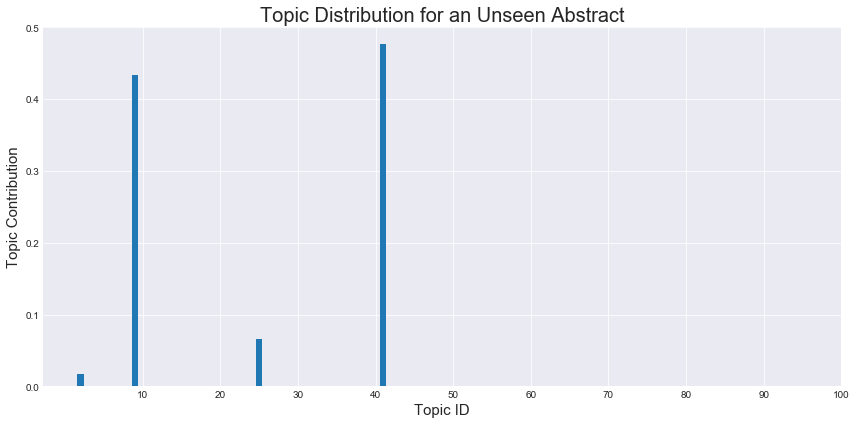

In [109]:
# bar plot of topic distribution for this document
fig, ax = plt.subplots(figsize=(12,6));
# the histogram of the data
patches = ax.bar(np.arange(len(new_doc_distribution)), new_doc_distribution)
ax.set_xlabel('Topic ID', fontsize=15)
ax.set_ylabel('Topic Contribution', fontsize=15)
ax.set_title("Topic Distribution for an Unseen Abstract", fontsize=20)
ax.set_xticks(np.linspace(10,100,10))
fig.tight_layout()
plt.show()

### Get the most Dominant topic and compare it to our entire corpus:

In [110]:
# print the top 8 contributing topics and their words
for i in new_doc_distribution.argsort()[-2:][::-1]:
    print(i, lda.show_topic(topicid=i, topn=10), "\n")

41 [('protein', 0.039871987), ('antibody', 0.02679529), ('acid', 0.02612854), ('comprising', 0.016463306), ('peptide', 0.016448885), ('composition', 0.015892636), ('binding', 0.015321432), ('polypeptide', 0.014504879), ('sequence', 0.014139527), ('molecule', 0.013245971)] 

9 [('treatment', 0.039999485), ('disease', 0.031493854), ('treating', 0.023470415), ('composition', 0.023168905), ('compound', 0.02315092), ('disorder', 0.018596334), ('cancer', 0.018294318), ('subject', 0.0146844145), ('patient', 0.01356583), ('inhibitor', 0.012192045)] 



### EXAMPLES (Took from the Hong Kong Intellectual Property Department 14 September 2018)


#### * Example 1:

WIPO Number : WO2011/062614

Title of the invention: " METHODS AND COMPOSITIONS FOR TREATING SYMPTOMS ASSOCIATED WITH POSTTRAUMATIC STRESS DISORDER USING CYCLOBENZAPRINE "

Abstract : "The present invention relates to methods for the treatment or prevention of symptoms associated with post-traumatic stress disorder, and related pharmaceutical compositions. Of particular interest are pharmaceutical compositions comprising a very low dose of cyclobenzaprine, alone, or in combination with an alpha- 1- adrenergic receptor antagonist, a beta-adrenergic antagonist, an anticonvulsant, a selective serotonin reuptake inhibitor or a serotonin-norepinephrine reuptake inhibitor.

Inventor:  Tonix Pharma Holdings Limited, Hamilton, HM 12, BERMUDA 

#### * Example 2:

WIPO Number: WO2013/120075

Titile of the invention:   PERFORMANCE ASSESSMENT TOOL

Abstract: Embodiments of the invention relate to cognitive performance and/or psychological assessment of a subject. Measurement of behavioral status and cognitive efficiency is based upon batteries of tests that include a combination of cognitive and/or psychological tests. A module is provided with a processing unit in communication with memory to administer the cognitive and/or psychological tests and to compute an assessment. Results of the assessment are conveyed on a visual display of the module. In some cases, additional sensor data may be added to the assessment.

Inventor : ANTHROTRONIX, INC., UNITED STATES OF AMERICA 

#### * Example 3:

WIPO Number: WO2014/055385

Title of the invention: ' MEDICAL FASTENER' 

Abstract: "A dual-start fastener is disclosed having two threads helically wound about its shaft. The thread tooth profile (in section) constitutes substantially parallel upper and lower facets on each thread flank. A first thread has a crest diameter greater than a second thread. A distal end of the fastener includes self-tapping cutters formed on the threads which force shards of bone to advance into shallow troughs adjacent the cutters for subsequent resorption by adjacent osseous tissue."

Inventor:    Reed, Gary Jack, UNITED STATES OF AMERICA 

#### * Example 4:

WIPO Number: WO2009/150902

Title of the invention: COMPOSITION FOR EXTERNAL USE

Abstract: Provided is a composition for external use comprising (A) an essential oil that can augment the IGF-1 secretion-promoting effects of essential oils, and (B) at least one selected from a group consisting of purine bases and salts thereof. Also provided is a composition for external use that increases the moisture content of the stratum corneum of the skin and can maintain the amount of trans-epidermal moisture loss at an appropriate level.

Inventor:  OTSUKA PHARMACEUTICAL CO., LTD., JAPAN 

#### * Example 5:

WIPO Number: WO2012/054077

Title of the invention:  HUMAN ANTIBODIES AND DIAGNOSTIC AND THERAPEUTIC USES THEREOF FOR THE
TREATMENT OF NEUROLOGICAL DISEASE 

Abstract: Specific binding members, particularly human antibodies, particularly recombinant antibodies, and fragments thereof, which are capable of binding to and recognizing neurons in the CNS and eliciting responses in CNS neurons are provided. The antibodies are useful for neuroprotection and in the diagnosis and treatment of conditions associated with nerve damage, injury or degeneration and neurodegenerative disease. The antibodies, variable regions or CDR domain sequences thereof, and fragments thereof of the invention may also be used in therapy in combination with chemotherapeutics, immune modulators, or neuroactive agents and/or with other antibodies or fragments thereof. Antibodies are exemplified by the antibodies lgM12 and lgM42 whose sequences are provided herein. 

Inventor:  MAYO FOUNDATION FOR MEDICAL EDUCATION AND RESEARCH, UNITED STATES OF AMERICA  